# **Tour de Hanoi**

« Les tours de Hanoï » est un jeu de réflexion imaginé par le mathématicien français Édouard Lucas, et consistant à déplacer des disques de diamètres différents d’une tour de « départ » à une tour d’« arrivée » en passant par une tour « intermédiaire », et ceci en un minimum de coups, tout en respectant les règles suivantes :

    on ne peut déplacer qu’un seul disque à la fois ;
    on ne peut pas placer un disque au dessus d’un disque plus petit.

    On suppose que cette dernière règle est également respectée dans la configuration de départ.




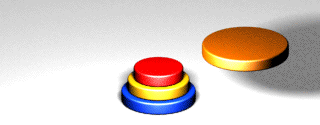

**Classe principale du jeu**

Le jeu des tours de Hanoï est défini par la classe Jeu_Hanoi
suivante (on utilise un système de piles). :

In [14]:
class Jeu_Hanoi:
    def __init__(self, nbr_disq = 6):        
        self.n = nbr_disq
        self.A = Pile()
        self.B = Pile()
        self.C = Pile()
        # Remplissage initial de la première pile
        for d in range(self.n):
            self.A.push(self.n-d)

    def get_tour(self, nom):
        """ Renvoie la Pile nommée nom (type str)
                exemple : 'A' --> self.A
        """
        if nom == 'A':
            return self.A
        elif nom == 'B':
            return self.B
        elif nom == 'C':
            return self.C
    
    def deplacer(self, depart, arrivee):
        depls = self.get_tour(depart)
        arrls = self.get_tour(arrivee)
        
        el = depls.pop()
        arrls.push(el)

class Pile:
    def __init__(self):
        self.l = []
    def est_vide(self):
        return len(self.l) == 0
    def pop(self):
        return self.l.pop(0)
    def push(self, n):
        self.l = [n] + self.l

**Affichage d’un disque**

La fonction ch_dsq(n)
doit permettre de générer une chaîne de caractères représentant un disque de taille n
(1 < n < nombre de disques dans le jeu). La longueur de cette chaîne ne dépend que du nombre de disques du jeu.

ch_dsq(4)→ 
```
"  ****|****  "
```

ch_dsq(0)→ 
```
"     |     "
```



**Compléter la fonction ch_dsq(n)** (testez les exemples ci-dessus)

In [15]:
def ch_dsq(n):
  fill_list = ["*" for i in range(0 + n)]
  empty_list = [" " for i in range(6 - n)]
  
  left = ''.join(empty_list) + ''.join(fill_list)
  right = ''.join(fill_list) + ''.join(empty_list)
  
  return left + '|' + right

assert ch_dsq(4)=="  ****|****  "
assert ch_dsq(0)=="      |      "

**Affichage d’une tour**

La fonction ch_tour(t)
permet de générer une liste de chaînes de caractères représentant l’ensemble des disques présents sur la tour t
. 
La taille de de cette liste doit être toujours égale au nombre de disques du jeu.

Cette fonction prend une pile en argument.

Exemple pour une tour de 4 disques dans un jeu à 6 disques :

```
["      |      ", "      |      ", "     *|*     ", "   ***|***   ", "  ****|****  ", "******|******"]
```



**Compléter la fonction ch_tour(t)**
permettant de générer une liste de lignes de texte représentant l’ensemble des disques fichés sur la tour t
.

In [16]:
def ch_tour(t):
	flist = []
    
	ttmp = Pile()
	while not t.est_vide():
		nv = t.pop()
		ttmp.push(nv)
  
		nlist = ch_dsq(nv)
		flist.append(nlist)
  
	# ajout des manquants
	mq = 6 - len(flist)
	ap = [ch_dsq(0) for i in range(mq)]
 
	flist = ap + flist
	
	# reremplissage
	while not ttmp.est_vide():
		t.push(ttmp.pop())

	return flist

p=Pile()
p.push(4)
p.push(3)
p.push(2)
p.push(1)

assert ch_tour(p)==['      |      ', '      |      ', '     *|*     ', '    **|**    ', '   ***|***   ', '  ****|****  ']

p=Pile()
p.push(4)
p.push(2)
assert ch_tour(p)==['      |      ', '      |      ', '      |      ', '      |      ', '    **|**    ', '  ****|****  ']

La méthode **get_tour**
attend un seul argument (de type str
, valant 'A'
, 'B'
ou 'C'
) désignant une des tours du jeu et renvoie l’attribut A
, B
ou C
de l’objet de type Jeu_Hanoi
(de type Pile
).

Écrire, pour la classe Jeu_Hanoi
, une méthode **deplacer**
, qui attend deux arguments de type str
désignant deux des tours du jeu, et déplace le disque depuis la tour de « départ » (1er argument de la méthode) jusqu’à la tour d' »arrivée » (2ème argument de la méthode).

In [17]:
monjeu = Jeu_Hanoi()    #Je crée mon jeu avec les 6 disques sur la tour A
monjeu.deplacer('A','B')  # je déplace un disque de A vers B
monjeu.deplacer('A','C')  # je déplace un disque de A vers C
pileA=monjeu.get_tour('A')
pileB=monjeu.get_tour('B')
pileC=monjeu.get_tour('C')
assert ch_tour(pileA) == ['      |      ', '      |      ', '   ***|***   ', '  ****|****  ', ' *****|***** ', '******|******']
assert ch_tour(pileB) == ['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '     *|*     ']
assert ch_tour(pileC) == ['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '    **|**    ']

**Résolution du jeu**

La résolution du jeu peut se faire de façon extrêmement simple … si l’on parvient à identifier la récursivité de la méthode :

Déplacer une pile de n disques depuis une tour de départ vers une tour d’arrivée en utilisant une tour libre (opération que l’on n’a pas le droit de faire en une seule étape) :



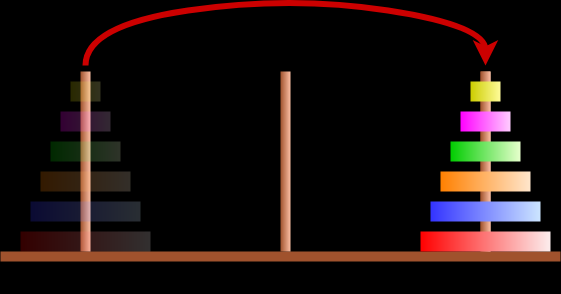

Revient à :

déplacer une pile de n-1 disques depuis une tour de départ vers une tour libre (opération que l’on n’a pas le droit de faire en une seule étape) :


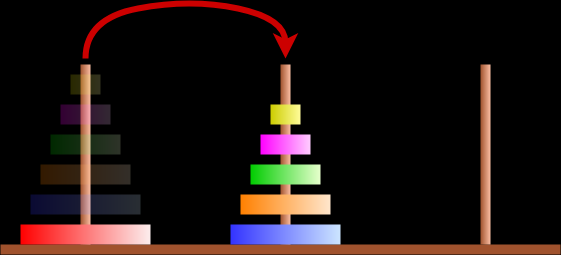

déplacer le disque restant (depuis la tour de départ) vers la tour d’arrivée (opération autorisée !) :

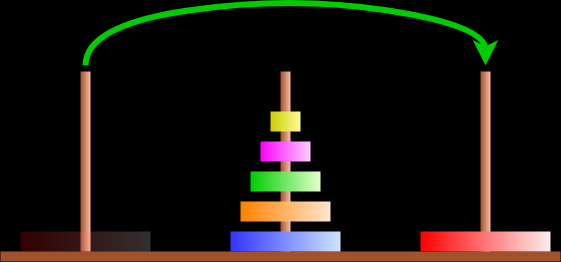

et enfin re-déplacer la pile de n-1 disques depuis la tour initialement libre (et qui le redevient !) vers la tour d’arrivée (opération que l’on n’a pas le droit de faire en une seule étape) :

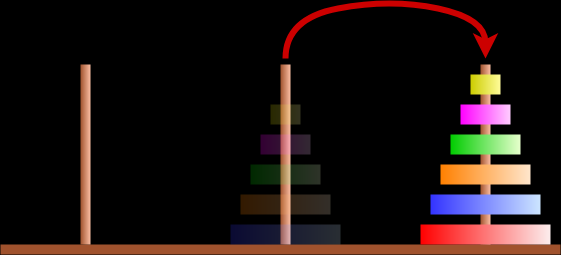

**Écrire** une fonction **hanoi(j, n, d, a, l)**
, sous forme récursive qui résout le jeu j
(type Jeu_Hanoi
) , ce qui revient à déplacer n
disques (de type int) depuis une tour de départ d
(type str
) vers une tour d’arrivée a
(type str
) en utilisant une tour libre l
(type str
).

In [18]:
def hanoi(j, n, d, a, l):
  dep =  j.get_tour(d)
  vide = j.get_tour(l)
  arr = j.get_tour(a)

  if n == 1:
    # déplacer disque restant (le seul disque)
    j.deplacer(d, a)
  else:
    # déplacer n-1 disques du départ à une tour libre
    hanoi(j, n-1, d, l, a)
    
    # déplacer le disque restant
    j.deplacer(d, a)
    
    # deplacer n-1 disques de la tour libre à l'arrivée   
    hanoi(j, n-1, l, a, d)

In [19]:
j = Jeu_Hanoi()
pileA=j.get_tour('A')
pileB=j.get_tour('B')
pileC=j.get_tour('C')
print('début du jeu')
print(ch_tour(pileA))
print(ch_tour(pileB))
print(ch_tour(pileC))
hanoi(j, j.n, 'A', 'C', 'B')
print('après résolution du jeu')
assert ch_tour(pileA) == ['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '      |      ']
assert ch_tour(pileB) == ['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '      |      ']
assert ch_tour(pileC) == ['     *|*     ', '    **|**    ', '   ***|***   ', '  ****|****  ', ' *****|***** ', '******|******']

début du jeu
['     *|*     ', '    **|**    ', '   ***|***   ', '  ****|****  ', ' *****|***** ', '******|******']
['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '      |      ']
['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '      |      ']
après résolution du jeu


Dernière chose à faire, nous allons compter le nombre de déplacements nécessaires à la résolution du jeu.

Pour cela nous allons ajouter un attribut à la classe Hanoi (nbdeplacements) que nous allons initialiser à 0.
Puis à chaque déplacement, nous allons incrémenter cette valeur de 1.

Rééxécutez le jeu, puis affichez le nombre de coups

In [22]:
# Affichez le nombre de coups nécessaires pour résoudre le jeu

def hanoi(j, n, d, a, l, nbdep = 0):
  dep =  j.get_tour(d)
  vide = j.get_tour(l)
  arr = j.get_tour(a)

  if n == 1:
    # déplacer disque restant (le seul disque)
    j.deplacer(d, a)
    
    # affichage des coups
    if dep.est_vide() and vide.est_vide():
      print("Coups nécéssaires : " + str(nbdep) + " coups")
  else:
    # déplacer n-1 disques du départ à une tour libre
    hanoi(j, n-1, d, l, a, nbdep+1)
    
    # déplacer le disque restant
    j.deplacer(d, a)
    
    # deplacer n-1 disques de la tour libre à l'arrivée   
    hanoi(j, n-1, l, a, d, nbdep+1)
    
j = Jeu_Hanoi()
pileA=j.get_tour('A')
pileB=j.get_tour('B')
pileC=j.get_tour('C')
print('début du jeu')
print(ch_tour(pileA))
print(ch_tour(pileB))
print(ch_tour(pileC))
hanoi(j, j.n, 'A', 'C', 'B')

début du jeu
['     *|*     ', '    **|**    ', '   ***|***   ', '  ****|****  ', ' *****|***** ', '******|******']
['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '      |      ']
['      |      ', '      |      ', '      |      ', '      |      ', '      |      ', '      |      ']
Coups nécéssaires : 5 coups
